<a href="https://colab.research.google.com/github/aasthagoyal46/Kaggle/blob/master/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
# from sklearn.model_selection import StratifiedKFold
from bayes_opt import BayesianOptimization
# from skopt import BayesSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import files

In [26]:
pip install bayesian-optimization

In [0]:
train_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/train_final.csv"
test_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/test_final.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [29]:
train.shape

(16383, 26)

In [0]:
train.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1


In [0]:
train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


In [0]:
train.isnull().sum().sum()

0

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB


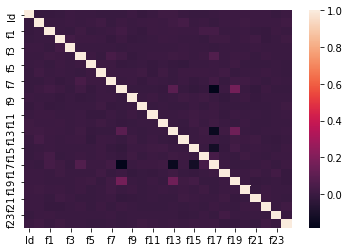

In [0]:
sns.heatmap(train.corr())

In [0]:
trainX = train.iloc[:, 2:]
trainY = train.iloc[:, 1]
testX = test.iloc[:, 1:]

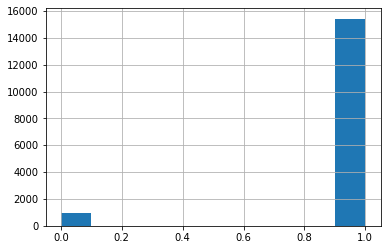

In [0]:
trainY.hist()

In [0]:
def roc_cv(model, x, y):
  roc = cross_validate(model, x, y, scoring="roc_auc", cv = 5)
  return(roc['test_score'].mean())

In [0]:
def predictResults(name, model):
  model.fit(trainX, trainY)
  pred = model.predict(testX)
  result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
  result.to_csv('result'+name+'.csv', index = False)
  files.download('result'+name+'.csv')

In [0]:
def predictProb(name, model):
  model.fit(trainX, trainY)
  pred = model.predict_proba(testX)[:, 1]
  result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
  result.to_csv('result'+name+'.csv', index = False)
  files.download('result'+name+'.csv')

In [0]:
lr = LogisticRegression()
print("Logistic Regression CV:", roc_cv(lr, trainX, trainY))
# predictResults("LR", lr)
predictProb("LR", lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression CV: 0.4961680268771126


In [0]:
dt = DecisionTreeClassifier()
print("Decision Tree Classifier CV:", roc_cv(dt, trainX, trainY))
# predictResults("DT", dt)
predictProb("DT", dt)

Decision Tree Classifier CV: 0.6699207201677664


In [0]:
SVM = SVC(probability = True)
print("SVC CV:", roc_cv(SVM, trainX, trainY))
# predictResults("SVC", SVM)
predictProb("SVC", SVM)

SVC CV: 0.5250014049990182


In [0]:
LDA = LinearDiscriminantAnalysis()
print("Linear Discriminent Analysis CV:", roc_cv(LDA, trainX, trainY))
# predictResults("LDA", LDA)
predictProb("LDA", LDA)

Linear Discriminent Analysis CV: 0.5388893751132682


In [0]:
QDA = QuadraticDiscriminantAnalysis()
print("Quadratic Discriminant Analysis CV:", roc_cv(QDA, trainX, trainY))
# predictResults("QDA", QDA)
predictProb("QDA", QDA)

Quadratic Discriminant Analysis CV: 0.5407467847172551


In [0]:
rf = RandomForestClassifier()
print("Random Forest CV:", roc_cv(rf, trainX, trainY))
# predictResults("RF", rf)
predictProb("RF", rf)

Random Forest CV: 0.8587284754375952


In [0]:
KNN = KNeighborsClassifier()
print("KNN CV:", roc_cv(KNN, trainX, trainY))
# predictResults("KNN", KNN)
predictProb("KNN", KNN)

KNN CV: 0.6372843655768655


In [0]:
NB = GaussianNB()
print("NB CV:", roc_cv(NB, trainX, trainY))
# predictResults("NB", NB)
predictProb("NB", NB)

NB CV: 0.56185708485301


In [0]:
XGB = XGBClassifier()
print("XGBoost CV:", roc_cv(XGB, trainX, trainY))
# predictResults("XGB", XGB)
predictProb("XGB", XGB)

XGBoost CV: 0.8442619280808291


In [34]:
bayes_cv_tuner = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 0,
    refit = True,
    random_state = 42
)

NameError: ignored

In [0]:
result = bayes_cv_tuner.fit(trainX, trainY)

ValueError: ignored

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.20)

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)


In [39]:
#Importing necessary libraries
from bayes_opt import BayesianOptimization
import xgboost as xgb

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators, learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'auc'}
  #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
  return cv_result['test-auc-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,200)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.809    |  0.7876   |  0.6255   |  3.27     |  111.4    |
|  2        |  0.7757   |  0.1407   |  0.6563   |  6.48     |  111.5    |
|  3        |  0.8047   |  0.2054   |  0.4251   |  4.05     |  104.5    |
|  4        |  0.817    |  0.01957  |  0.225    |  5.568    |  104.8    |
|  5        |  0.7758   |  0.07697  |  0.7054   |  5.433    |  106.4    |
|  6        |  0.7959   |  0.2078   |  0.4872   |  6.668    |  113.7    |
|  7        |  0.8365   |  0.996    |  0.1088   |  8.201    |  119.6    |
|  8        |  0.8016   |  0.4465   |  0.7741   |  3.067    |  108.8    |
|  9        |  0.5      |  0.0      |  0.0      |  3.0      |  120.0    |
|  10       |  0.5      |  1.0      |  0.0      |  10.0     |  100.0    |
|  11       |  0.5      |  1.0      |  0.0      |  10.0     |  117.6    |
|  12       |  0.7682   |  1.0      | 

In [44]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

#Initialize an XGBClassifier with the tuned parameters and fit the training data
classifier2 = XGBClassifier(**params).fit(trainX, trainY)

#predicting for training set
predictBayesXGB = classifier2.predict_proba(testX)[:,1]

# Looking at the classification report
# print(classification_report(predictBayesXGB))

{'gamma': 0.996048952691193, 'learning_rate': 0.1088439708485891, 'max_depth': 8.200970753233978, 'n_estimators': 119.56253729978171}


In [0]:
result = pd.DataFrame({"Id": test["Id"], 'Y':predictBayesXGB})
result.to_csv('resultBayes.csv', index = False)
files.download('resultBayes.csv')